In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import tslearn
import sklearn
from utilities import *
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans;


c:\Users\maurizio\anaconda\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


# import and pre-processing

In [2]:
df = pd.read_csv('../dati/serie-storiche-ecommerce.csv', quotechar = "'", parse_dates = ['data'], decimal = ',')

In [3]:
processed_df = pivot_scale_and_fillna(df).reset_index()
df_for_clustering = processed_df.drop(columns = ['data']).T.to_numpy()[..., np.newaxis]

# clustering

In [5]:
km = TimeSeriesKMeans(n_clusters = 6, metric="euclidean", max_iter=5, max_iter_barycenter=5, random_state=0)

In [6]:
km_fitted = km.fit(df_for_clustering)

In [7]:
cluster_predicted = km.fit_predict(df_for_clustering)

In [8]:
sector_associated_to_clusters = associate_sector_to_category(cluster_predicted, 6, df)

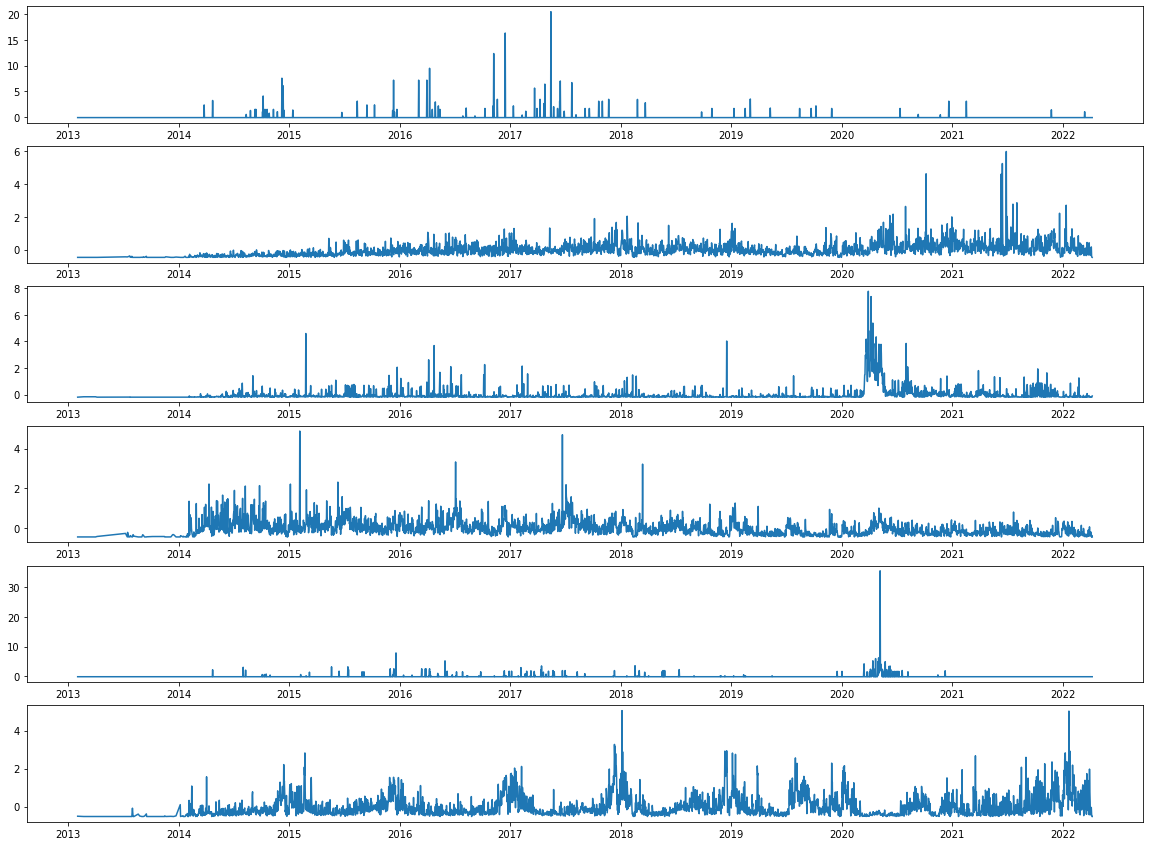

In [9]:
plot_clusters(6, km_fitted, processed_df = processed_df)